# Produce X 101 voting manipulation: Exploring the factors that motivade Mnet producers to manipulate the votes of Produce X 101

## Project Proposal

# 1. Aims and background 

## 1.1 Introduction

The following is an analysis of the scandal in which the popular South Korean survival series Produce 101 was embroiled after the revelation of voting manipulation across its four seasons, said analysis will only concern the last season of this show, Produce X 101. 

Produce X 101 is a survival competition that follows a group of 101 male trainees, as in individuals who come from different South Korean entertainment agencies with previous training in different areas of singing, rapping and dancing, who wish to form part of the final lineup of participants who will get to debut on a boy band with a contract of five years. The participants who get to form part of this lineup are to be chosen in accordance to the publics election, the public is refereed as producers. This season introduces a change to the usual ranking system, instead of the trainees being graded from A to F they will be graded from A to X, with the participants who finish in rank X being unable to access the training facilities of the competition, also for the final lineup instead of choosing the final eleven participants as in previous seasons, only the final ten will form part of the group with the eleven member being the one with the greatest number of votes accumulated during the whole run of the show.

After the airing of the final episode, in July 2019, several complaints regarding vote manipulation started being expressed by viewers of the show who noticed numerical patterns in the votes displayed on screen. The first of August 272 viewers field a lawsuit against Mnet, the broadcasting company who aired the show, because the text voting service of the show charged 100 won per vote, which initiated an investigation led by the Seoul Metropolitan Office.

"Ahn Joon-young and Kim Yong-bum, producers for the Produce 101 series, were arrested on November 5, 2019. Ahn later admitted to manipulating the rankings to all four seasons of the Produce 101 series. On December 3, 2019, Ahn, Kim, and six other entertainment agency representatives were indicted for charges including obstruction of business, fraud, and bribery. A court trial began on December 20, 2019."(Wikipeadia, 2022).

X1, the group formed during the show, was disbanded 5 months after its debut, on January 6 2020 and "Final arguments were heard on 12 May 2020 with the prosecution requesting prison sentences of three years each for producing director (PD) Ahn Joon-young and chief producer (CP) Kim Yong-bum; two years for assistant PD Lee Mi-kyung; and one year for each of the five agency representatives charged with collusion.

The sentencing hearing took place on 29 May at Seoul District Court; all eight defendants heard guilty verdicts. PD Ahn Joon-young was fined ₩37 million and sentenced to two years; CP Kim Yong-beom was sentenced to 20 months; and assistant PD Lee Mi-kyung was fined ₩10 million. Agency representatives identified only as "Kim", "Lee", and "Ryu" were fined ₩7 million apiece, while two additional representatives both identified as "Kim" were each fined ₩5 million"(Wikipedia, 2022).

## 1.2 Aims and Objectives

The aim of this analysis is to unveil the reason for which the voting manipulation occurred within the show, it is expected that after the relevant results are obtained a more clear understanding of the reasons that motivated Ahn Joon-young and Kim Yong-bum to manipulate the final lineup will be disclosed. Specifically it is hoped further understanding of the specific profile or characteristics the producers were looking for the final lineup will be obtained and from it a more clear understanding behind the fraud.

The objectives of this analysis and what it would like to explore are the following:
1. Determine the general profile of the participants of the show
2. Determine the profile of the final lineup
3. Determine the profile of the trainees who were left out of the final group
4. Compare the profile of the trainees victims of vote manipulation against those put on their place and their general relation with the final lineup.
5. Look for the relationships denoted after the comparison and from them stablish conclusions.

By profile it is understood as the characteristics that delimit the chances of success when debuting: company, age, physical factors such as weight or height, training time, skills, evaluation given by the judges and votes and ranking across the episodes.

## 1.3 Data

## Data requirements

Three sets of data were chosen for the completion of this project, they were chose taking as basis that they included and complemented relevant aspects of the profile of each participant of the show, this with the intention of creating a unique final data set that introduced all relevant aspects that could be necessary for the analysis. It is also important to take as a consideration that the specific information necessary for this project, although not scarce was is still somewhat limited.

## Choice of data sets

The first and main data set used for this analysis belongs to the List of Produce X 101 contestans available on Wikipedia, the reason why this one was considered is because it contains a well organized and complete list of all 101 participants which includes rankings and votes as well as which company the trainees belong to. In comparison with other resources found online this was the only one that included complete information regarding ranking and votes.

To complement the information obtained above, which was more of quantitative character, a second data set was obtained from 'K-pop database', this one included qualitative aspects of the contestants such as age, height and weight, but because this information was not enough to completely stablish a qualitative profile of the contestants a third dataset was introduce in the form of a CSV file that recompiled the skills and training time of contestants according to the information presented in the website 'Kpop profiles'

## 1.4 Ethical Considerations

None of the websites from which the data sets were retrieved had a clause forbidding webscraping in their terms and conditions. Additionally, all the information retrieved for this analysis was of public knowledge due to this being a show of public broadcast. 

Consent to use content:

Under the Creative Commons Attribution-ShareAlike 3.0 Unported License all data available on wikipedia is free to be shared and adapted with the understanding the proper attribution must be specified.

Kpop database did not have any specification regarding the use of their data, but upon contacting them I was granted permission to use it under the conditions of it being required for academic purposes and adding due attribution.

In the case of Kpop profiles, from which the data for the third data set was obtained from, they did clearly specified no reuse of their data was allowed without proper attribution, sharing a link to the site in the references.

## Reuseage of data and derived data

Any desire to reuse the data utilized for this project would need to abide the terms dictated by the owners of it and in accordance to the time frame for which it is required. All the data derived from this project is considered as of individual property, and will require permission for its future use.

## Potential impacts of the analysis outcome data

Because of the potential nefarious implications the insights derived from this project could cause, a risk analysis was conducted in which it was concluded that because this is a legal case whose sentence has already been dictated and this analysis only aims to confirm what has already been stablished during the investigation, there does not really exists a reason for which this project could intervene in any way that could cause legal implications or further harm to the parts involved.

In [1]:
#import libraries and modules
import pandas as pd # library for data analysis
import requests # library to handle requests
from bs4 import BeautifulSoup # library to parse HTML documents
import re # library for requests
import numpy as np # library for dataframes
from matplotlib import pyplot as plt # module for plotting diagrams
from wordcloud import WordCloud # module for wordclouds

# 2. Webscraping and cleaning data

The below function checks if a webpage is accessible and returns the content if it is:

In [2]:
# get the response in the form of html
dataurl="https://dbkpop.com/db/produce-x-101-contestants/"
response=requests.get(dataurl)
wikiurl="https://en.wikipedia.org/wiki/List_of_Produce_X_101_contestants#Contestants"
response1=requests.get(wikiurl)


if (response.status_code and response1.status_code) != 200:
    print("error")
else:
    print(response.status_code and response1.status_code)


200


The first dataset to be scrapped is that which contains the height and weights of the contestants, it will be transformed into a dataframe and from there modified to fit with the rest of the data

In [3]:
# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(response.text, 'html.parser')
indiatable=str(soup.find('table',{'class':"responsive"}))
indiatable = re.sub(r'<.*?>', lambda g: g.group(0).upper(), indiatable)

In [4]:
df=pd.read_html(str(indiatable))
# convert list to dataframe
df=pd.DataFrame(df[0])
print(display(df))

,Name,Korean Name,Company,Age,Height,Weight,Ev1,Ev2,Ep1,Ep2
0,Peak,픽,Chandelier Music,19,186cm,71kg,D,NaN,34,42
1,Son Dongpyo,손동표,DSP Media,18,166cm,48kg,B,A,6,6
2,Lee Junhyuk,이준혁,DSP Media,20,180cm,63kg,C,A,68,65
3,Lee Hwan,이환,DSP Media,21,169cm,53kg,B,NaN,46,49
4,Uehara Jun,우에하라 준,JH1 Entertainment,24,176cm,60kg,D,NaN,88,96
...,...,...,...,...,...,...,...,...,...,...
96,Jeong Jaehun,정재훈,Around Us,20,180cm,68kg,A,NaN,65,66
97,Choi Sihyuk,최시혁,Around Us,20,171cm,58kg,B,NaN,69,70
98,Yu Seongjun,유성준,Yuehua,19,185cm,64kg,X,NaN,78,93
99,Cho Seungyoun,조승연,Yuehua,24,183cm,68kg,B,NaN,67,41


None


In [5]:
#drop the columns with unnecesary information
df = df.drop(columns=['Ev1', 'Ev2', 'Ep1', 'Ep2'])
display(df)

,Name,Korean Name,Company,Age,Height,Weight
0,Peak,픽,Chandelier Music,19,186cm,71kg
1,Son Dongpyo,손동표,DSP Media,18,166cm,48kg
2,Lee Junhyuk,이준혁,DSP Media,20,180cm,63kg
3,Lee Hwan,이환,DSP Media,21,169cm,53kg
4,Uehara Jun,우에하라 준,JH1 Entertainment,24,176cm,60kg
...,...,...,...,...,...,...
96,Jeong Jaehun,정재훈,Around Us,20,180cm,68kg
97,Choi Sihyuk,최시혁,Around Us,20,171cm,58kg
98,Yu Seongjun,유성준,Yuehua,19,185cm,64kg
99,Cho Seungyoun,조승연,Yuehua,24,183cm,68kg


In [6]:
#sort the names of the participants in alphabetical order
df_sorted = df.sort_values(by=['Name'], ascending=True)
df_sorted.set_index('Name', inplace=True)
display(df_sorted)

,Korean Name,Company,Age,Height,Weight
Name,,,,,
Anzardi Timothee,앙자르디 디모데,ESteem,21,180cm,68kg
Baek Jin,백진,Vine,25,174cm,60kg
Byeon Seongtae,변성태,Urban Works,22,180cm,64kg
Cha Junho,차준호,Woollim,18,178cm,63kg
Cho Seungyoun,조승연,Yuehua,24,183cm,68kg
...,...,...,...,...,...
Yoon Minguk,윤민국,Souce Music,18,181cm,68kg
Yu Seongjun,유성준,Yuehua,19,185cm,64kg
Yun Hyunjo,윤현조,Gost,23,188cm,70kg


The second data set is also the main data set, first it will be scrapped and then transformed into a dataframe from where it will be cleaned and adjusted so it can fit with the date set above

In [7]:
# parse data from the html into a beautifulsoup object
soup1 = BeautifulSoup(response1.text, 'html.parser')
indiatable1 =str(soup1.find('table',{'class':"wikitable"}))

In [8]:
df1=pd.read_html(str(indiatable1))
# convert list to dataframe
df1=pd.DataFrame(df1[0])
print(display(df1))

Company                               Name Age  \
                        Company                               Name Age   
                        Company                               Name Age   
0    Individual Trainee (개인연습생)                     Lee Hyeop (이협)  21   
1    Individual Trainee (개인연습생)                  Choi Suhwan (최수환)  19   
2    Individual Trainee (개인연습생)               Kang Seok-hwa (강석화)2  20   
3    Individual Trainee (개인연습생)             Kim Sungyeon (김성연)2 15  18   
4    Individual Trainee (개인연습생)                   Lee Eugene (이유진)  16   
..                          ...                                ...  ..   
96             YG Entertainment  Mahiro Hidaka (히다카 마히로) / （日高真宙)2  19   
97             YG Entertainment        Wang Jyunhao (왕군호) / (王君豪)2  20   
98   Yuehua Entertainment (위에화)              Cho Seungyoun (조승연)16  24   
99   Yuehua Entertainment (위에화)               Hwang Geumryul (황금률)  22   
100  Yuehua Entertainment (위에화)                  Yu Seongjun (유성준)  19   

    Judges evaluation    Ranking                                        \
    Judges evaluation    Ep.1[2] Ep.2[3] Ep.3[4] Episode 5               
                    1  2       #       #       #         #    Votes 21   
0                   C  C      40      48      52        49       85520   
1                   A  A      56      56      24        24      280824   
2                   C  B      21      29      35        35      156788   
3                   C  B      54      52      56        59       68946   
4                   X  F       7      12      16        27      247706   
..                ... ..     ...     ...     ...       ...         ...   
96                  D  D      47      45      53        56       71950   
97                  C  F      42      37      46        54       74073   
98                  B  B      67      41      38        28      235056   
99                  C  B      66      68      77        84  Eliminated   
100                 X  F      78      93      95        86  Eliminated   

                                                                             \
           Ep.6   Episode 8              Episode 11              Episode 12   
              #           #       Votes           #    Votes 24           #   
0            40          26      418222          24  Eliminated  Eliminated   
1            28          29      363605          28  Eliminated  Eliminated   
2            34          35      301720  Eliminated  Eliminated  Eliminated   
3            49          45      227444  Eliminated  Eliminated  Eliminated   
4            53          55      161710  Eliminated  Eliminated  Eliminated   
..          ...         ...         ...         ...         ...         ...   
96           58          49      205369  Eliminated  Eliminated  Eliminated   
97           60          58      150579  Eliminated  Eliminated  Eliminated   
98           19          17      754435           6      281580           5   
99   Eliminated  Eliminated  Eliminated  Eliminated  Eliminated  Eliminated   
100  Eliminated  Eliminated  Eliminated  Eliminated  Eliminated  Eliminated   

                                          
                Total No. of Votes Final  
          Votes Total No. of Votes Final  
0    Eliminated           503,742+    24  
1    Eliminated           644,429+    28  
2    Eliminated             458508    35  
3    Eliminated             296390    45  
4    Eliminated             409416    55  
..          ...                ...   ...  
96   Eliminated             277319    49  
97   Eliminated             224652    58  
98       929311            2200382     5  
99   Eliminated         Eliminated    84  
100  Eliminated         Eliminated    86  

[101 rows x 19 columns]

None


In [9]:
#Assigne new header, remove index and sort alphabetically
df1.columns = ["Company", "Name", "Age", "Judges_Evaluation1", "Judges_Evaluation2", "Ranking_Ep.1", "Ranking_Ep.2", "Ranking_Ep.3", "Ranking_Ep.5", "Votes_Ep.5", "Ranking_Ep.6", "Ranking_Ep.8", "Votes_Ep.8", "Ranking_Ep.11", "Votes_Ep.11", "Ranking_Ep.12", "Votes_Ep.12", "Total_Votes", "Final_Ranking"]
print(display(df1))

,Company,Name,Age,Judges_Evaluation1,Judges_Evaluation2,Ranking_Ep.1,Ranking_Ep.2,Ranking_Ep.3,Ranking_Ep.5,Votes_Ep.5,Ranking_Ep.6,Ranking_Ep.8,Votes_Ep.8,Ranking_Ep.11,Votes_Ep.11,Ranking_Ep.12,Votes_Ep.12,Total_Votes,Final_Ranking
0,Individual Trainee (개인연습생),Lee Hyeop (이협),21,C,C,40,48,52,49,85520,40,26,418222,24,Eliminated,Eliminated,Eliminated,"503,742+",24
1,Individual Trainee (개인연습생),Choi Suhwan (최수환),19,A,A,56,56,24,24,280824,28,29,363605,28,Eliminated,Eliminated,Eliminated,"644,429+",28
2,Individual Trainee (개인연습생),Kang Seok-hwa (강석화)2,20,C,B,21,29,35,35,156788,34,35,301720,Eliminated,Eliminated,Eliminated,Eliminated,458508,35
3,Individual Trainee (개인연습생),Kim Sungyeon (김성연)2 15,18,C,B,54,52,56,59,68946,49,45,227444,Eliminated,Eliminated,Eliminated,Eliminated,296390,45
4,Individual Trainee (개인연습생),Lee Eugene (이유진),16,X,F,7,12,16,27,247706,53,55,161710,Eliminated,Eliminated,Eliminated,Eliminated,409416,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,YG Entertainment,Mahiro Hidaka (히다카 마히로) / （日高真宙)2,19,D,D,47,45,53,56,71950,58,49,205369,Eliminated,Eliminated,Eliminated,Eliminated,277319,49
97,YG Entertainment,Wang Jyunhao (왕군호) / (王君豪)2,20,C,F,42,37,46,54,74073,60,58,150579,Eliminated,Eliminated,Eliminated,Eliminated,224652,58
98,Yuehua Entertainment (위에화),Cho Seungyoun (조승연)16,24,B,B,67,41,38,28,235056,19,17,754435,6,281580,5,929311,2200382,5
99,Yuehua Entertainment (위에화),Hwang Geumryul (황금률),22,C,B,66,68,77,84,Eliminated,Eliminated,Eliminated,Eliminated,Eliminated,Eliminated,Eliminated,Eliminated,Eliminated,84


None


In [10]:
#adjust non korean participant names to fit the korean standard 
def changeName(row, names):
    df1.at[row,'Name']=names
    
changeName(4, 'Lee Yoogene (이유진)')
changeName(13, 'Jeong Jaehun (정재훈)')
changeName(24, 'Peak Kongthap')
changeName(25, 'Gwon Huijun (권희준)')
changeName(26, 'Steven Kim (킴 스티븐)')
changeName(33, 'Anzardi Timothée (앙자르디 디모데)')
changeName(44, 'Uehara Jun (우에하라 준) / (上原潤)')
changeName(96, 'Hidaka Mahiro (히다카 마히로) / （日高真宙)')
changeName(47, 'Yun Seobin (윤서빈)')
changeName(79, 'Kim Seonghyun (김성현)')
changeName(85, 'Hong Seonghyun (홍성현)')

In [11]:
#sort value alphabetically by name
df1_sorted = df1.sort_values(by=['Name'], ascending=True)
df1_sorted = df1_sorted.reset_index()
df1_sorted = df1_sorted.drop(columns=['index'])
display(df1_sorted)

,Company,Name,Age,Judges_Evaluation1,Judges_Evaluation2,Ranking_Ep.1,Ranking_Ep.2,Ranking_Ep.3,Ranking_Ep.5,Votes_Ep.5,Ranking_Ep.6,Ranking_Ep.8,Votes_Ep.8,Ranking_Ep.11,Votes_Ep.11,Ranking_Ep.12,Votes_Ep.12,Total_Votes,Final_Ranking
0,ESteem,Anzardi Timothée (앙자르디 디모데),21,X,F,49,53,61,61,Eliminated,Eliminated,Eliminated,Eliminated,Eliminated,Eliminated,Eliminated,Eliminated,Eliminated,61
1,VINE Entertainment (바인),Baek Jin (백진)15,25,B,F,30,32,42,45,98209,30,36,284725,Eliminated,Eliminated,Eliminated,Eliminated,382934,36
2,Urban Works Media (얼반웍스),Byun Seongtae (변성태),22,D,D,60,67,70,66,Eliminated,Eliminated,Eliminated,Eliminated,Eliminated,Eliminated,Eliminated,Eliminated,Eliminated,66
3,Woollim Entertainment (울림),Cha Junho (차준호),18,C,C,4,11,11,11,499672,15,13,1011352,11,181445,9,756939,2449408,9
4,Yuehua Entertainment (위에화),Cho Seungyoun (조승연)16,24,B,B,67,41,38,28,235056,19,17,754435,6,281580,5,929311,2200382,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,Source Music (쏘스뮤직),Yoon Minguk (윤민국),18,D,B,96,85,99,92,Eliminated,Eliminated,Eliminated,Eliminated,Eliminated,Eliminated,Eliminated,Eliminated,Eliminated,92
97,Yuehua Entertainment (위에화),Yu Seongjun (유성준),19,X,F,78,93,95,86,Eliminated,Eliminated,Eliminated,Eliminated,Eliminated,Eliminated,Eliminated,Eliminated,Eliminated,86
98,Gost Entertainment,Yun Hyunjo (윤현조),23,X,F,98,81,90,96,Eliminated,Eliminated,Eliminated,Eliminated,Eliminated,Eliminated,Eliminated,Eliminated,Eliminated,96
99,Brand New Music,Yun Junghwan (윤정환),19,A,B,58,18,23,31,212257,35,38,275950,Eliminated,Eliminated,Eliminated,Eliminated,488207,38


To further complement the data set the relevant columns from the first data set will be added to the main data set

In [12]:
#add the columns of height and weight from the first data set 
df1_sorted['Height'] = df_sorted['Height'].values
df1_sorted['Weight'] = df_sorted['Weight'].values
df1_sorted

,Company,Name,Age,Judges_Evaluation1,Judges_Evaluation2,Ranking_Ep.1,Ranking_Ep.2,Ranking_Ep.3,Ranking_Ep.5,Votes_Ep.5,...,Ranking_Ep.8,Votes_Ep.8,Ranking_Ep.11,Votes_Ep.11,Ranking_Ep.12,Votes_Ep.12,Total_Votes,Final_Ranking,Height,Weight
0,ESteem,Anzardi Timothée (앙자르디 디모데),21,X,F,49,53,61,61,Eliminated,...,Eliminated,Eliminated,Eliminated,Eliminated,Eliminated,Eliminated,Eliminated,61,180cm,68kg
1,VINE Entertainment (바인),Baek Jin (백진)15,25,B,F,30,32,42,45,98209,...,36,284725,Eliminated,Eliminated,Eliminated,Eliminated,382934,36,174cm,60kg
2,Urban Works Media (얼반웍스),Byun Seongtae (변성태),22,D,D,60,67,70,66,Eliminated,...,Eliminated,Eliminated,Eliminated,Eliminated,Eliminated,Eliminated,Eliminated,66,180cm,64kg
3,Woollim Entertainment (울림),Cha Junho (차준호),18,C,C,4,11,11,11,499672,...,13,1011352,11,181445,9,756939,2449408,9,178cm,63kg
4,Yuehua Entertainment (위에화),Cho Seungyoun (조승연)16,24,B,B,67,41,38,28,235056,...,17,754435,6,281580,5,929311,2200382,5,183cm,68kg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,Source Music (쏘스뮤직),Yoon Minguk (윤민국),18,D,B,96,85,99,92,Eliminated,...,Eliminated,Eliminated,Eliminated,Eliminated,Eliminated,Eliminated,Eliminated,92,181cm,68kg
97,Yuehua Entertainment (위에화),Yu Seongjun (유성준),19,X,F,78,93,95,86,Eliminated,...,Eliminated,Eliminated,Eliminated,Eliminated,Eliminated,Eliminated,Eliminated,86,185cm,64kg
98,Gost Entertainment,Yun Hyunjo (윤현조),23,X,F,98,81,90,96,Eliminated,...,Eliminated,Eliminated,Eliminated,Eliminated,Eliminated,Eliminated,Eliminated,96,188cm,70kg
99,Brand New Music,Yun Junghwan (윤정환),19,A,B,58,18,23,31,212257,...,38,275950,Eliminated,Eliminated,Eliminated,Eliminated,488207,38,181cm,66kg


Convert the final data set from a CSV file to a dataframe so it can be worked with

In [13]:
#read CSV file
df3 = pd.read_csv("encoded-trainningskill.csv")
df3.head()

,Name,Trainning Period (in months),Skill
0,Anzardi Timothée (???? ???),3,singer
1,Baek Jin (??),20,dancer
2,Byun Seongtae (???),41,dancer
3,Cha Junho (???),15,singer
4,Cho Seungyoun (???),108,rapper


The relevant data correspondent to this data set will be added to the main data set 

In [14]:
#Add the columns of skill and trainning period to the main data set
df1_sorted['Skill'] = df3['Skill'].values
df1_sorted['TrainningMonths'] = df3['Trainning Period (in months)'].values
df1_sorted

,Company,Name,Age,Judges_Evaluation1,Judges_Evaluation2,Ranking_Ep.1,Ranking_Ep.2,Ranking_Ep.3,Ranking_Ep.5,Votes_Ep.5,...,Ranking_Ep.11,Votes_Ep.11,Ranking_Ep.12,Votes_Ep.12,Total_Votes,Final_Ranking,Height,Weight,Skill,TrainningMonths
0,ESteem,Anzardi Timothée (앙자르디 디모데),21,X,F,49,53,61,61,Eliminated,...,Eliminated,Eliminated,Eliminated,Eliminated,Eliminated,61,180cm,68kg,singer,3
1,VINE Entertainment (바인),Baek Jin (백진)15,25,B,F,30,32,42,45,98209,...,Eliminated,Eliminated,Eliminated,Eliminated,382934,36,174cm,60kg,dancer,20
2,Urban Works Media (얼반웍스),Byun Seongtae (변성태),22,D,D,60,67,70,66,Eliminated,...,Eliminated,Eliminated,Eliminated,Eliminated,Eliminated,66,180cm,64kg,dancer,41
3,Woollim Entertainment (울림),Cha Junho (차준호),18,C,C,4,11,11,11,499672,...,11,181445,9,756939,2449408,9,178cm,63kg,singer,15
4,Yuehua Entertainment (위에화),Cho Seungyoun (조승연)16,24,B,B,67,41,38,28,235056,...,6,281580,5,929311,2200382,5,183cm,68kg,rapper,108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,Source Music (쏘스뮤직),Yoon Minguk (윤민국),18,D,B,96,85,99,92,Eliminated,...,Eliminated,Eliminated,Eliminated,Eliminated,Eliminated,92,181cm,68kg,singer,25
97,Yuehua Entertainment (위에화),Yu Seongjun (유성준),19,X,F,78,93,95,86,Eliminated,...,Eliminated,Eliminated,Eliminated,Eliminated,Eliminated,86,185cm,64kg,rapper,27
98,Gost Entertainment,Yun Hyunjo (윤현조),23,X,F,98,81,90,96,Eliminated,...,Eliminated,Eliminated,Eliminated,Eliminated,Eliminated,96,188cm,70kg,rapper,8
99,Brand New Music,Yun Junghwan (윤정환),19,A,B,58,18,23,31,212257,...,Eliminated,Eliminated,Eliminated,Eliminated,488207,38,181cm,66kg,singer,30


The following section consists of further cleaning the data of unrequired values and transforming the data to the correct data types.

In [15]:
#the following function extracts all string values from the columns in which only numerical values are required
def stringExtractor(column, kind):
    df1_sorted[column] = df1_sorted[column].str.extract(kind)
    
stringExtractor('Ranking_Ep.2', '(\d+)')
stringExtractor('Ranking_Ep.3', '(\d+)')
stringExtractor('Ranking_Ep.5', '(\d+)')
stringExtractor('Votes_Ep.5', '(\d+)')
stringExtractor('Ranking_Ep.6', '(\d+)')
stringExtractor('Ranking_Ep.8', '(\d+)')
stringExtractor('Votes_Ep.8', '(\d+)')
stringExtractor('Ranking_Ep.11', '(\d+)')
stringExtractor('Votes_Ep.11', '(\d+)')
stringExtractor('Votes_Ep.12', '(\d+)')
stringExtractor('Total_Votes', '(\d+)')
stringExtractor('Height', '(\d+)')
stringExtractor('Weight', '(\d+)')

df1_sorted

,Company,Name,Age,Judges_Evaluation1,Judges_Evaluation2,Ranking_Ep.1,Ranking_Ep.2,Ranking_Ep.3,Ranking_Ep.5,Votes_Ep.5,...,Ranking_Ep.11,Votes_Ep.11,Ranking_Ep.12,Votes_Ep.12,Total_Votes,Final_Ranking,Height,Weight,Skill,TrainningMonths
0,ESteem,Anzardi Timothée (앙자르디 디모데),21,X,F,49,53,61,61,NaN,...,NaN,NaN,Eliminated,NaN,NaN,61,180,68,singer,3
1,VINE Entertainment (바인),Baek Jin (백진)15,25,B,F,30,32,42,45,98209,...,NaN,NaN,Eliminated,NaN,382934,36,174,60,dancer,20
2,Urban Works Media (얼반웍스),Byun Seongtae (변성태),22,D,D,60,67,70,66,NaN,...,NaN,NaN,Eliminated,NaN,NaN,66,180,64,dancer,41
3,Woollim Entertainment (울림),Cha Junho (차준호),18,C,C,4,11,11,11,499672,...,11,181445,9,756939,2449408,9,178,63,singer,15
4,Yuehua Entertainment (위에화),Cho Seungyoun (조승연)16,24,B,B,67,41,38,28,235056,...,6,281580,5,929311,2200382,5,183,68,rapper,108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,Source Music (쏘스뮤직),Yoon Minguk (윤민국),18,D,B,96,85,99,92,NaN,...,NaN,NaN,Eliminated,NaN,NaN,92,181,68,singer,25
97,Yuehua Entertainment (위에화),Yu Seongjun (유성준),19,X,F,78,93,95,86,NaN,...,NaN,NaN,Eliminated,NaN,NaN,86,185,64,rapper,27
98,Gost Entertainment,Yun Hyunjo (윤현조),23,X,F,98,81,90,96,NaN,...,NaN,NaN,Eliminated,NaN,NaN,96,188,70,rapper,8
99,Brand New Music,Yun Junghwan (윤정환),19,A,B,58,18,23,31,212257,...,NaN,NaN,Eliminated,NaN,488207,38,181,66,singer,30


In [16]:
#this function removes all values between parenthesis and replaces them with an empty space, so all hangul can be
#removed from the data set
def removeHangul(column, kind, after):
    df1_sorted[column] = df1_sorted[column].str.replace(kind,after, regex=True)
    
removeHangul('Name', r"\(.*\)", "")
removeHangul('Company', r"\(.*\)", "")
df1_sorted['Name'] = df1_sorted['Name'].str.replace('\d+', '', regex=True)
df1_sorted

,Company,Name,Age,Judges_Evaluation1,Judges_Evaluation2,Ranking_Ep.1,Ranking_Ep.2,Ranking_Ep.3,Ranking_Ep.5,Votes_Ep.5,...,Ranking_Ep.11,Votes_Ep.11,Ranking_Ep.12,Votes_Ep.12,Total_Votes,Final_Ranking,Height,Weight,Skill,TrainningMonths
0,ESteem,Anzardi Timothée,21,X,F,49,53,61,61,NaN,...,NaN,NaN,Eliminated,NaN,NaN,61,180,68,singer,3
1,VINE Entertainment,Baek Jin,25,B,F,30,32,42,45,98209,...,NaN,NaN,Eliminated,NaN,382934,36,174,60,dancer,20
2,Urban Works Media,Byun Seongtae,22,D,D,60,67,70,66,NaN,...,NaN,NaN,Eliminated,NaN,NaN,66,180,64,dancer,41
3,Woollim Entertainment,Cha Junho,18,C,C,4,11,11,11,499672,...,11,181445,9,756939,2449408,9,178,63,singer,15
4,Yuehua Entertainment,Cho Seungyoun,24,B,B,67,41,38,28,235056,...,6,281580,5,929311,2200382,5,183,68,rapper,108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,Source Music,Yoon Minguk,18,D,B,96,85,99,92,NaN,...,NaN,NaN,Eliminated,NaN,NaN,92,181,68,singer,25
97,Yuehua Entertainment,Yu Seongjun,19,X,F,78,93,95,86,NaN,...,NaN,NaN,Eliminated,NaN,NaN,86,185,64,rapper,27
98,Gost Entertainment,Yun Hyunjo,23,X,F,98,81,90,96,NaN,...,NaN,NaN,Eliminated,NaN,NaN,96,188,70,rapper,8
99,Brand New Music,Yun Junghwan,19,A,B,58,18,23,31,212257,...,NaN,NaN,Eliminated,NaN,488207,38,181,66,singer,30


In [17]:
#this function changes the data type of the values in a column
def changeType(column, kind):
    df1_sorted[column] = df1_sorted[column].astype(kind)

changeType('Height', int)
changeType('Weight', int)
changeType('Ranking_Ep.1', 'Int64')
changeType('Ranking_Ep.2', 'Int64')
changeType('Ranking_Ep.3', 'Int64')
changeType('Ranking_Ep.5', 'Int64')
changeType('Votes_Ep.5', 'Int64')
changeType('Ranking_Ep.6', 'Int64')
changeType('Ranking_Ep.8', 'Int64')
changeType('Votes_Ep.8', 'Int64')
changeType('Ranking_Ep.11', 'Int64')
changeType('Votes_Ep.11', 'Int64')
changeType('Votes_Ep.12', 'Int64')
changeType('Total_Votes', 'Int64')

In [18]:
df1_sorted

,Company,Name,Age,Judges_Evaluation1,Judges_Evaluation2,Ranking_Ep.1,Ranking_Ep.2,Ranking_Ep.3,Ranking_Ep.5,Votes_Ep.5,...,Ranking_Ep.11,Votes_Ep.11,Ranking_Ep.12,Votes_Ep.12,Total_Votes,Final_Ranking,Height,Weight,Skill,TrainningMonths
0,ESteem,Anzardi Timothée,21,X,F,49,53,61,61,<NA>,...,<NA>,<NA>,Eliminated,<NA>,<NA>,61,180,68,singer,3
1,VINE Entertainment,Baek Jin,25,B,F,30,32,42,45,98209,...,<NA>,<NA>,Eliminated,<NA>,382934,36,174,60,dancer,20
2,Urban Works Media,Byun Seongtae,22,D,D,60,67,70,66,<NA>,...,<NA>,<NA>,Eliminated,<NA>,<NA>,66,180,64,dancer,41
3,Woollim Entertainment,Cha Junho,18,C,C,4,11,11,11,499672,...,11,181445,9,756939,2449408,9,178,63,singer,15
4,Yuehua Entertainment,Cho Seungyoun,24,B,B,67,41,38,28,235056,...,6,281580,5,929311,2200382,5,183,68,rapper,108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,Source Music,Yoon Minguk,18,D,B,96,85,99,92,<NA>,...,<NA>,<NA>,Eliminated,<NA>,<NA>,92,181,68,singer,25
97,Yuehua Entertainment,Yu Seongjun,19,X,F,78,93,95,86,<NA>,...,<NA>,<NA>,Eliminated,<NA>,<NA>,86,185,64,rapper,27
98,Gost Entertainment,Yun Hyunjo,23,X,F,98,81,90,96,<NA>,...,<NA>,<NA>,Eliminated,<NA>,<NA>,96,188,70,rapper,8
99,Brand New Music,Yun Junghwan,19,A,B,58,18,23,31,212257,...,<NA>,<NA>,Eliminated,<NA>,488207,38,181,66,singer,30


Before starting the analysis of relevant data the dataset prepared will be saved as a 'csv' file, the reason why this approach was preferred over directly working with the dataset in its datframe format is that this way allows for consistency in the future, so even if parts of the previously done web scrapping and cleaning stop working the obtained dataset will still be available for the purposes of this research.

In [19]:
df1_sorted.to_csv("ProduceX101Data.csv")

# 3. Data Analysis

First the previously prepared dataframe will be imported as a new dataframe called 'contestants'.

In [20]:
contestants = pd.read_csv("ProduceX101Data.csv")

## 3.1 Analysis of the profile of all Produce X 101 contestants 

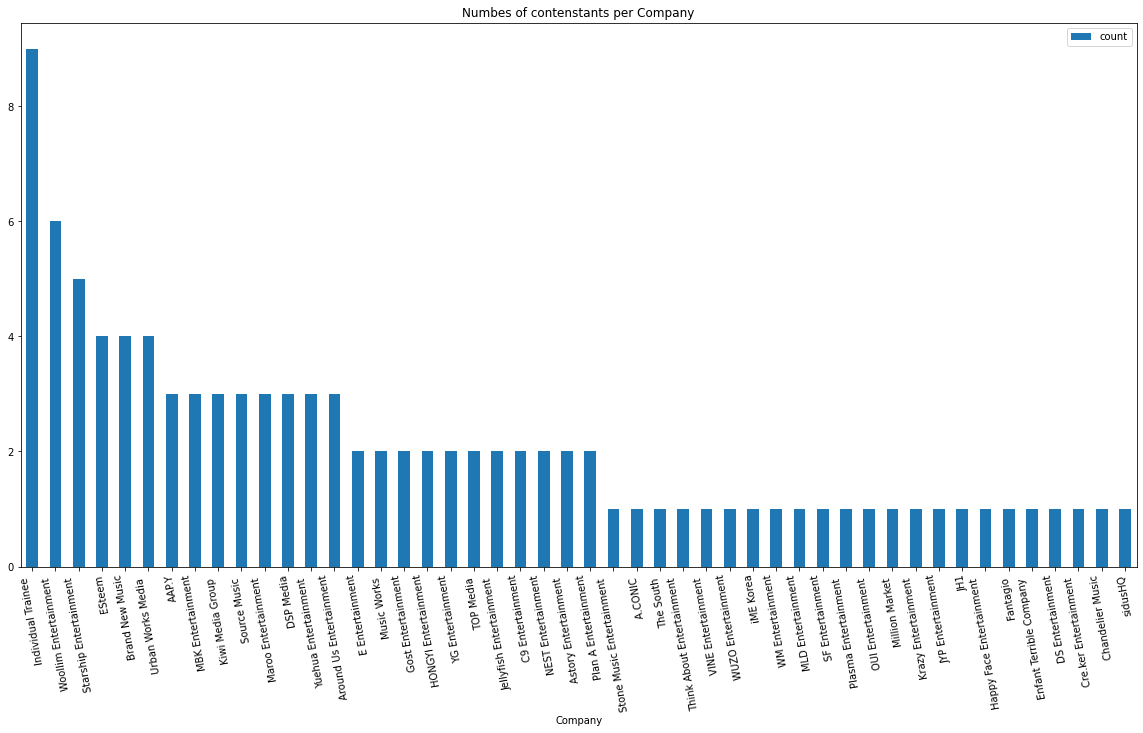

,Company,count
0,Individual Trainee,9
1,Woollim Entertainment,6
2,Starship Entertainment,5
3,ESteem,4
4,Brand New Music,4
5,Urban Works Media,4
6,AAP.Y,3
7,MBK Entertainment,3
8,Kiwi Media Group,3
9,Source Music,3


In [21]:
#this function counts the number of contestants for each company and plots a bar graphics to represent this information
def companyAnalysis(dataset):
    company = dataset.groupby('Company')['Name'].count().reset_index(name='count').sort_values(['count'],ascending=False).iloc[0:]
    company.plot.bar(x='Company',title='Numbes of contenstants per Company', rot=100, figsize=(20,10))
    plt.show()
    company.reset_index(drop=True, inplace=True)
    return company

companyAnalysis(contestants)

Most companies send only between one and four trainees to the show, the only companies who exceeded this number are Woolim entertainment and Starship entertainment, with six and five trainees correspondently.

The average age is 20
The most common age is 18


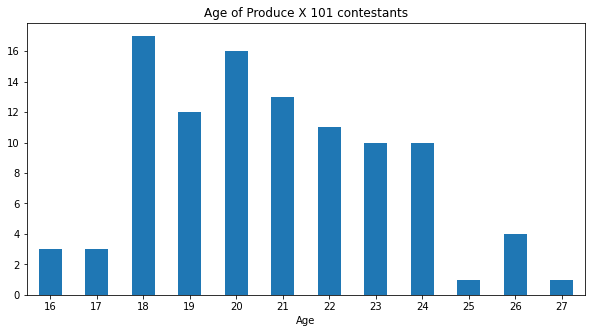

In [22]:
#this function compares the number of trainees by age and returns a bar graphic with this information plus
#the average and most common one
def ageAnalysis(dataset, titles):
    age = dataset.groupby('Age')['Name'].count()
    print(f'The average age is {int(np.mean(dataset.Age))}')
    print(f'The most common age is {int(np.bincount(dataset.Age).argmax())}')
    age.plot.bar(title=titles,rot=0, figsize=(10,5))
    plt.show()

ageAnalysis(contestants, 'Age of Produce X 101 contestants')

The age of trainees who partook on this season ranges from sixteen years old to twenty seven years old, a eleven years difference, most trainees are between 18 and 24 years old, with the most common age being 18 and the average age 20.

The average height is 177
The most common Height is 173


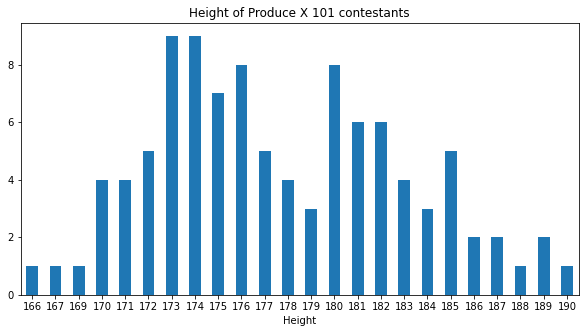

In [23]:
#this function compares the number of trainees by height and returns a bar graphic with this information plus
#the average height and most common one
def heightsAnalysis(dataset, titles):
    height = dataset.groupby('Height')['Name'].count()
    print(f'The average height is {int(np.mean(dataset.Height))}')
    print(f'The most common Height is {int(np.bincount(dataset.Height).argmax())}')
    height.plot.bar(title=titles ,rot=0, figsize=(10,5))
    plt.show()
    
heightsAnalysis(contestants, 'Height of Produce X 101 contestants')

The height of trainees goes from 166cm to 190cm, an almost 30cm difference, most trainees are within the range of 170cm and 185cm, with the most common heights being 173cm and 174cm, and the average height 177cm.

The average Weight is 61
The most common Weight is 57


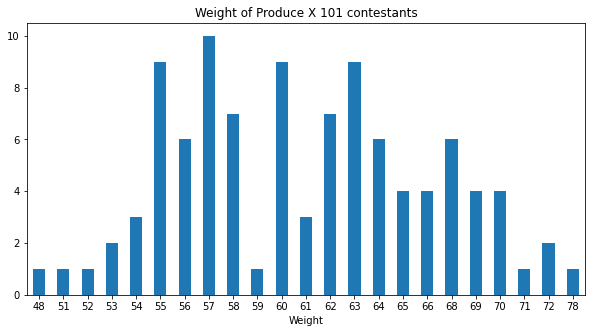

In [24]:
#this function compares the number of trainees by weight and returns a bar graphic with this information plus the average
#weight and most common one
def weightAnalysis(dataset, titles):
    weight = dataset.groupby('Weight')['Name'].count()
    print(f'The average Weight is {int(np.mean(dataset.Weight))}')
    print(f'The most common Weight is {int(np.bincount(dataset.Weight).argmax())}')
    weight.plot.bar(title=titles,rot=0, figsize=(10,5))
    plt.show()
    
weightAnalysis(contestants, 'Weight of Produce X 101 contestants')

The weight of trainees goes from 48kg to 78gk, a 30kg difference, most trainees are within the range of 54kg and 70kg, with the most common weight being 57kg and the average weight 57kg.

The average Trainning Period in months is 25
The most common Trainning Period in months is 14


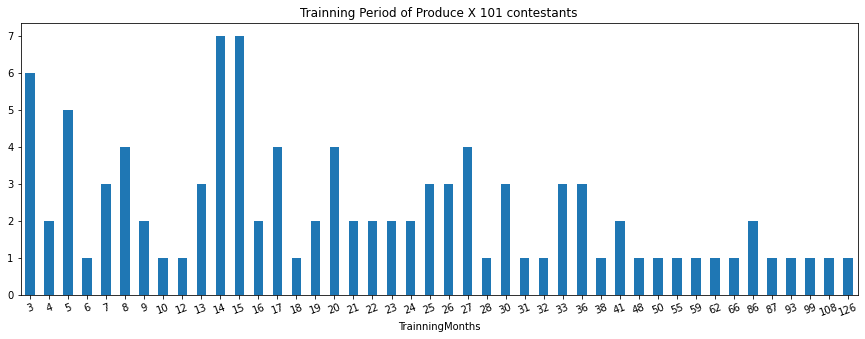

In [25]:
#this function compares the number of trainees by trainning period and returns a bar graphic with this information
#plus the average traninning period and most common one
def trainningAnalysis(dataset, titles):
    trainning = dataset.groupby('TrainningMonths')['Name'].count()
    print(f'The average Trainning Period in months is {int(np.mean(dataset.TrainningMonths))}')
    print(f'The most common Trainning Period in months is {int(np.bincount(dataset.TrainningMonths).argmax())}')
    trainning.plot.bar(title=titles,rot=20, figsize=(15,5))
    plt.show()
    
trainningAnalysis(contestants, 'Trainning Period of Produce X 101 contestants')

The training period was measured in months and it varies greatly from contestant to contestant going from 3 to 126 months, the most common training period is either 14 or 15 months and the average 25 months.

Skill
dancer    34
rapper    22
singer    45
Name: Name, dtype: int64


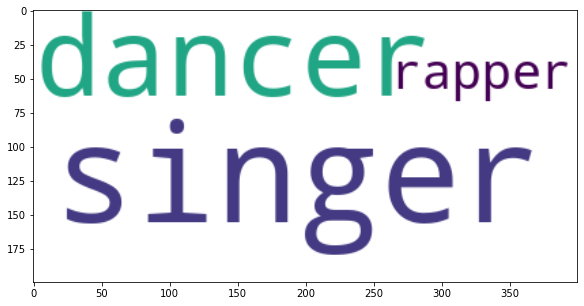

In [26]:
def skillAnalysis(dataset):
    skill = " ".join(review for review in dataset.Skill.astype(str))
    number = dataset.groupby('Skill')['Name'].count()
    print(number)
    wordcloud = WordCloud(background_color="white").generate(skill)
    # Display the generated Word Cloud
    plt.figure(figsize=(20,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()
    
skillAnalysis(contestants)

The participants are divided in terms of 3 talent areas singing, rapping and dancing. The most common skill among show contestants was singing with 45 participants, followed by dancing with 34 and at the last place rapping with 22 trainees.

Judges_Evaluation1
A    16
B    23
C    22
D    18
X    22
Name: Name, dtype: int64


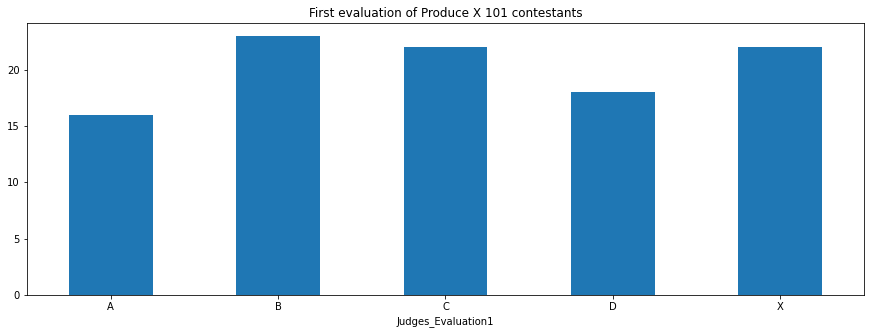

In [27]:
def evaluationOne(dataset, titles):
    evaluation1 = dataset.groupby('Judges_Evaluation1')['Name'].count()
    print(evaluation1)
    evaluation1.plot.bar(title=titles,rot=0, figsize=(15,5))
    plt.show()
    
evaluationOne(contestants, 'First evaluation of Produce X 101 contestants')

When contestants presented themselves for the first time on the show they had to perform in front of a panel of judges who will rank them in accordance to the level of their abilities, this ranks went from A to X, where A was the highest rank and X the lowest, participants under this last ranking were also not allowed to take part in the training inside the facilities of the show, which meant they had to train by their own. During this first evaluation most trainees ranked B, followed by C or X, then D and at the very last A.

Judges_Evaluation2
-     1
A    15
B    18
C    21
D    22
F    22
X     2
Name: Name, dtype: int64


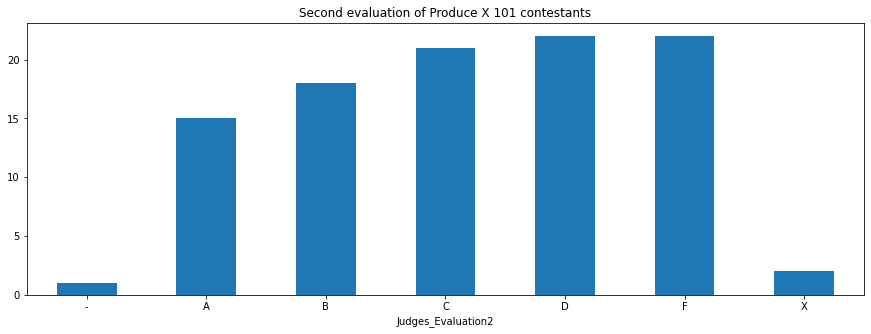

In [28]:
def evaluationTwo(dataset, titles):
    evaluation2 = dataset.groupby('Judges_Evaluation2')['Name'].count()
    print(evaluation2)
    evaluation2.plot.bar(title=titles,rot=0, figsize=(15,5))
    plt.show()
    
evaluationTwo(contestants, 'Second evaluation of Produce X 101 contestants')

The second evaluation was meant to determine the position of participants during the first stage, where they will perform the title song of the show for this season, it is an important evaluation as it will help determine initial exposure to viewers, during this evaluation trainees were evaluated on their ability to perform the choreography and song. Most trainees obtained a ranking of either D or F, followed by C, then B and A, only two participants obtained an X ranking and did not take part on the stage. The empty ranking signifies one participant who left the competition at this stage due to personal reasons.

## 3.2 Analysis of the profile of the 11 winners against the confirmed participants left out of the final line up

In order to obtain conclusive information about the reasons why the producers of Mnet decided to favour some trainees instead of the ones fair fully selected by the public, the following sections of the data analysis intends to compare the primary factors that could have led to said decisions.

### 3.2.1 The profile of X1

In the quest to draw conclusive reasoning about the vote manipulation first the profile that constitutes the selected winners will be determined, for it the dataset that constitutes said participants will be created, to find the winners among the 101 participants the first 10 participants with the highest number of votes in Episode 12 will be singled out from the rest of the dataset and to this list the participant whose Final Ranking equals X, correspondent to the trainee with the highest number of accumulated votes over the course of 12 episodes who wasn´t already in the lineup, will be added at the end.

In [29]:
Final_11=df1_sorted.sort_values(by=['Votes_Ep.12'],ascending=False).head(10)
X = df1_sorted.loc[df1_sorted['Final_Ranking']=='X']
Final_11 = Final_11.append(X, ignore_index = True)
Final_11

C:\Users\Usuario\AppData\Local\Temp\ipykernel_11204\821825349.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Final_11 = Final_11.append(X, ignore_index = True)


,Company,Name,Age,Judges_Evaluation1,Judges_Evaluation2,Ranking_Ep.1,Ranking_Ep.2,Ranking_Ep.3,Ranking_Ep.5,Votes_Ep.5,...,Ranking_Ep.11,Votes_Ep.11,Ranking_Ep.12,Votes_Ep.12,Total_Votes,Final_Ranking,Height,Weight,Skill,TrainningMonths
0,OUI Entertainment,Kim Yohan,21,A,C,3,1,1,1,1094299,...,1,582503,1,1334011,4468996,1,181,66,dancer,3
1,TOP Media,Kim Wooseok,24,B,A,5,7,6,4,933869,...,2,457477,2,1304033,4424309,2,173,58,singer,55
2,Plan A Entertainment,Han Seungwoo,26,A,A,39,39,34,30,212352,...,4,329581,3,1079200,2869629,3,182,63,singer,86
3,Starship Entertainment,Song Hyeongjun,18,X,D,9,10,4,3,1024849,...,8,242818,4,1049222,3735217,4,174,55,dancer,15
4,Yuehua Entertainment,Cho Seungyoun,24,B,B,67,41,38,28,235056,...,6,281580,5,929311,2200382,5,183,68,rapper,108
5,DSP Media,Son Dongpyo,18,B,A,6,6,7,7,710483,...,12,178034,6,824389,2762824,6,166,48,singer,17
6,MBK Entertainment,Lee Hangyul,21,C,D,41,28,28,21,326482,...,16,172067,7,794411,2221045,7,176,69,dancer,50
7,MBK Entertainment,Nam Dohyon,16,A,D,37,4,5,6,844597,...,7,272795,8,764443,3147303,8,180,62,rapper,5
8,Woollim Entertainment,Cha Junho,18,C,C,4,11,11,11,499672,...,11,181445,9,756939,2449408,9,178,63,singer,15
9,Starship Entertainment,Kang Minhee,18,X,D,11,20,18,22,311174,...,14,173169,10,749444,1798609,10,182,60,dancer,21


Then this dataframe will be converted into a 'csv' file for the sake of consistency across time, and back into a datframe so the appropriate analysis can be made

In [30]:
Final_11.to_csv("X1.csv")
X1 = pd.read_csv("X1.csv")

### Company analysis 

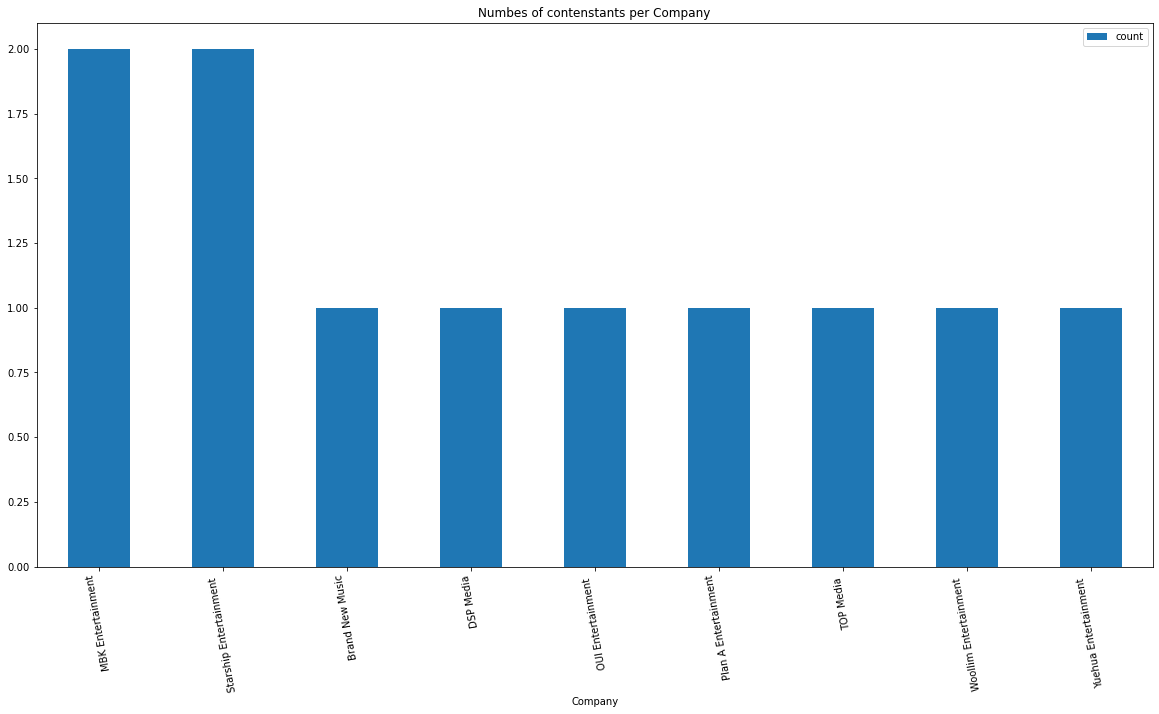

,Company,count
0,MBK Entertainment,2
1,Starship Entertainment,2
2,Brand New Music,1
3,DSP Media,1
4,OUI Entertainment,1
5,Plan A Entertainment,1
6,TOP Media,1
7,Woollim Entertainment,1
8,Yuehua Entertainment,1


In [31]:
companyAnalysis(X1)

After comparing the companies to which the winners of the show belong to, there seems to be a favoritism towards two specific entertainment companies MBK Entertainment and Starship Entertainment, because while every other company the winners belong to has only 1 participant in the final lineup, these ones have two, it is also worth mentioning that in the previous season (Produce 48) Starship entertainment also had two winners in the final lineup, plus having at least one winner in every season aside from season 2. Brand New Music, Woolim, MBK and Yuehua all have had at least one winner in one of the previous seasons. 

### Age Analysis

The average age is 20
The most common age is 18


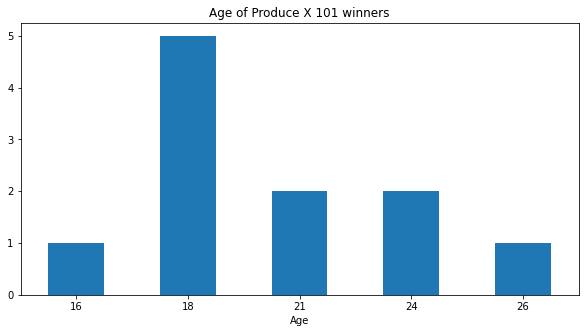

In [32]:
ageAnalysis(X1, 'Age of Produce X 101 winners')

In terms of age the favouritism tends to lean towards 18 and up, with 18 being the most popular age constituting nearly half of the members of the final lineup, while ages less than 18 and greater than 24 seem to be the least popular corresponding of only one member each.

### Height Analysis

The average height is 177
The most common Height is 182


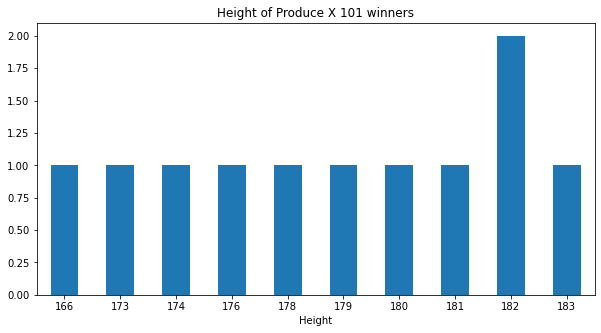

In [33]:
heightsAnalysis(X1, 'Height of Produce X 101 winners')

In terms of height there doesn't seem to a clear bias, since aside from two competitors all winners have different heights that vary by a great margin in terms of range. 

### Weight Analysis

The average Weight is 61
The most common Weight is 63


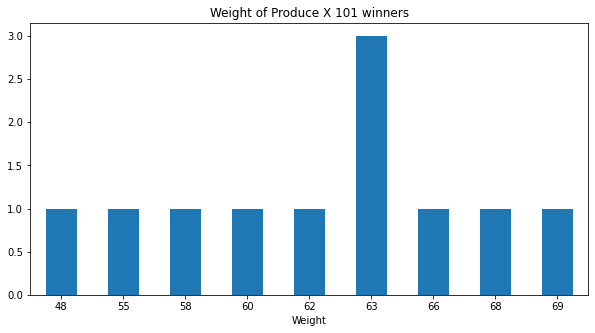

In [34]:
weightAnalysis(X1, 'Weight of Produce X 101 winners')

In terms of weight, correspondent to the height, there does not seem to exists a particular bias towards a specific body weight because this value varies from less than 50 kg to almost 70 kg, indicating in this case that weight nor height seem to have been taking into account by the producers when selecting the winners.

### Training Period Analysis

The average Trainning Period in months is 35
The most common Trainning Period in months is 15


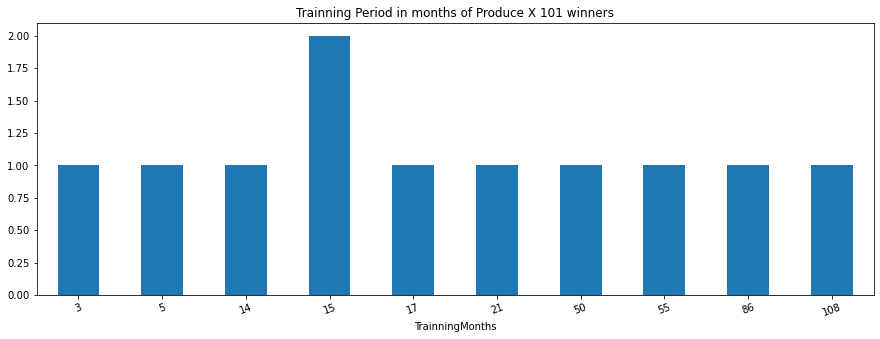

In [35]:
trainningAnalysis(X1, 'Trainning Period in months of Produce X 101 winners')

Surprisingly in terms of training period there also doesn't seems to exists a bias towards a specific training time, only two of the winners coincide in the time of training, being it 15 months, although generally training periods greater than this seem to be the preferred ones. When compared to the average training period of 101 participants of 25 months, the training period for X1 is 10 months longer in average. 

### Skill Analysis

Skill
dancer    4
rapper    2
singer    5
Name: Name, dtype: int64


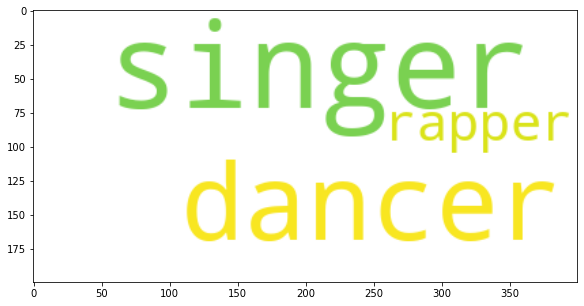

In [36]:
skillAnalysis(X1)

In concordance with the general skill profile of 101 contestants, the final lineup is also constituted of a majority of singers, 5 singers, followed by dancers, 4 dancers and in the minority the rappers, only two of them.

### Judges First Evaluation

Judges_Evaluation1
A    4
B    3
C    2
X    2
Name: Name, dtype: int64


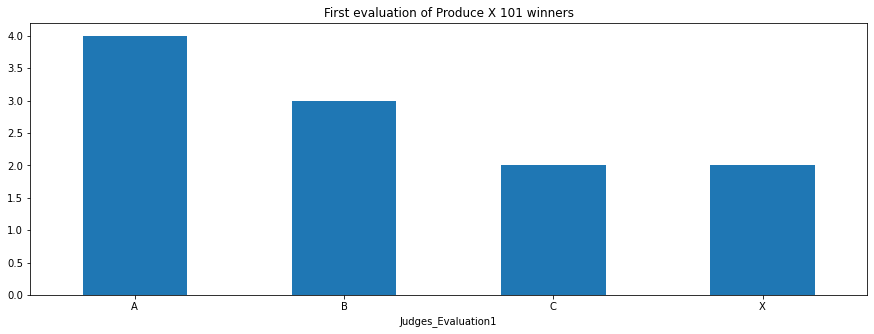

In [37]:
evaluationOne(X1, 'First evaluation of Produce X 101 winners')

For the first evaluation the majority of trainees obtained a evaluation of A or B, only two situated themselves in the C rank, no winner obtained a D on the first evaluation, and only two trainees of the final lineup ended up at the X rank, this could indicate that the producers favoured those trainees whose initial evaluation was on the higher spectrum.

### Judges Second Evaluation

Judges_Evaluation2
A    3
B    1
C    3
D    4
Name: Name, dtype: int64


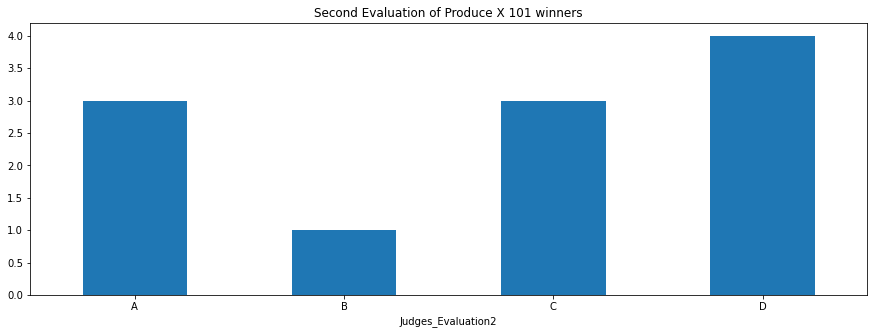

In [38]:
evaluationTwo(X1, 'Second Evaluation of Produce X 101 winners')

For the second evaluation no winners finished in the X rank, but there seems to be a decrease in ranks as most trainees this time ranked in D, although equal amount of them also ended up in C or A, with only one of the winners finishing in B. This could indicate that for the producers the first evaluation held more importance than the second, allowing for ranks below the top 2.

### Ranking Analysis

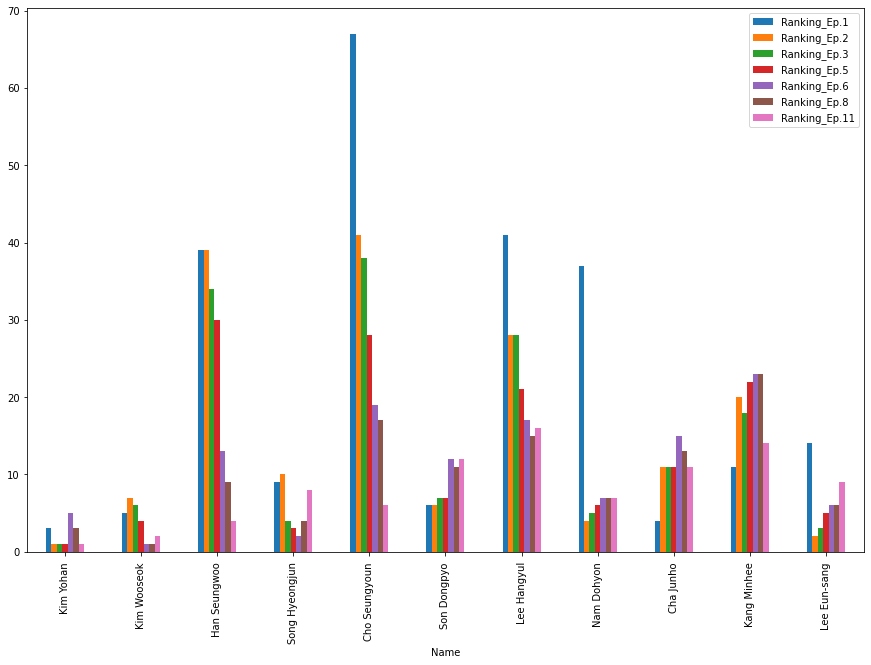

,Ranking_Ep.1,Ranking_Ep.2,Ranking_Ep.3,Ranking_Ep.5,Ranking_Ep.6,Ranking_Ep.8,Ranking_Ep.11,Ranking_Ep.12
0,3,1,1,1,5,3,1,1
1,5,7,6,4,1,1,2,2
2,39,39,34,30,13,9,4,3
3,9,10,4,3,2,4,8,4
4,67,41,38,28,19,17,6,5
5,6,6,7,7,12,11,12,6
6,41,28,28,21,17,15,16,7
7,37,4,5,6,7,7,7,8
8,4,11,11,11,15,13,11,9
9,11,20,18,22,23,23,14,10


In [39]:
def episodeRanking(dataset):
    votes = dataset[["Ranking_Ep.1", "Ranking_Ep.2", "Ranking_Ep.3", "Ranking_Ep.5", "Ranking_Ep.6", "Ranking_Ep.8", "Ranking_Ep.11", "Ranking_Ep.12"]]
    dataset.plot(x="Name", y=["Ranking_Ep.1", "Ranking_Ep.2", "Ranking_Ep.3", "Ranking_Ep.5", "Ranking_Ep.6", "Ranking_Ep.8", "Ranking_Ep.11", "Ranking_Ep.12"], kind="bar", figsize=(15, 10))
    plt.show()
    return votes

episodeRanking(X1)

With respect to the rankings the members in positions 1 to 4 almost always occupied positions around their final rankings, but from five onwards this was not the case having members who went half up across their rankings from one episode to another like the case of numbers 6 and 7, and members who experienced a gradual growth in rankings, like 9 and 10. The X member had occupied good positions all within the final 10 from episode 2 onwards this before the last episode, so him having the greater amount of accumulated votes across all episodes does not seem suspicious.

### Votes Analysis

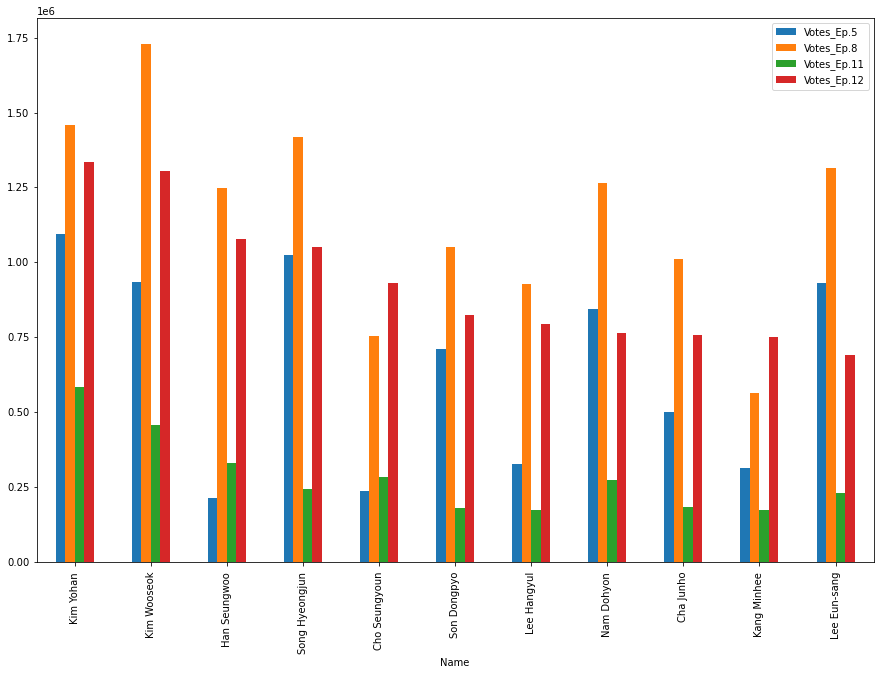

,Votes_Ep.5,Votes_Ep.8,Votes_Ep.11,Votes_Ep.12
0,1094299,1458183,582503,1334011
1,933869,1728930,457477,1304033
2,212352,1248496,329581,1079200
3,1024849,1418328,242818,1049222
4,235056,754435,281580,929311
5,710483,1049918,178034,824389
6,326482,928085,172067,794411
7,844597,1265468,272795,764443
8,499672,1011352,181445,756939
9,311174,564822,173169,749444


In [40]:
def episodeVotes(dataset):
    votes = dataset[["Votes_Ep.5", "Votes_Ep.8", "Votes_Ep.11", "Votes_Ep.12"]]
    dataset.plot(x="Name", y=["Votes_Ep.5", "Votes_Ep.8", "Votes_Ep.11", "Votes_Ep.12"], kind="bar", figsize=(15, 10))
    plt.show()
    return votes

episodeVotes(X1)

One interesting pattern shown in analysing the votes per episode is that all participants in the final lineup have a number of votes in episode 11 much lesser than their votes in episode 12, and in most cases also significantly lower than their votes in the 2 previous episodes. Another common characteristic that all winners share is that the number of votes in episode 2 in almost all cases is the greatest number of votes they got through all the show.

### 3.2.2 The profile of Produce X 101 vote manipulation victims

Although there exist a total of 6 confirmed manipulation victims in the show, there is only knowledge of three of them rightfully belonging to the final lineup. For the purposes of this research these three trainees will be the only ones analyzed in relation to the winners, since it will be more difficult and beyond the scope of this project to predict whether or not the other three confirmed voting manipulation victims could have ended up among the selected 11, due to the fact many of them were eliminated unfairly in earlier episodes. 

In [41]:
#dataset of the vote manipulation victims
def victimFinder(name):
    victims = df1_sorted.loc[df1_sorted['Name']==name]
    return victims

v0 = victimFinder('Koo Jungmo ')
v1 = victimFinder('Lee Jinhyuk ')
v2 = victimFinder('Keum Donghyun ')
voteVictims = v0.append(v1, ignore_index = True)
voteVictims = voteVictims.append(v2, ignore_index = True)
voteVictims

C:\Users\Usuario\AppData\Local\Temp\ipykernel_11204\3688304472.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  voteVictims = v0.append(v1, ignore_index = True)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_11204\3688304472.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  voteVictims = voteVictims.append(v2, ignore_index = True)


,Company,Name,Age,Judges_Evaluation1,Judges_Evaluation2,Ranking_Ep.1,Ranking_Ep.2,Ranking_Ep.3,Ranking_Ep.5,Votes_Ep.5,...,Ranking_Ep.11,Votes_Ep.11,Ranking_Ep.12,Votes_Ep.12,Total_Votes,Final_Ranking,Height,Weight,Skill,TrainningMonths
0,Starship Entertainment,Koo Jungmo,20,X,F,2,9,9,9,669616,...,15,172337,12,704748,2881427,13/6,181,58,singer,14
1,TOP Media,Lee Jinhyuk,24,B,A,38,35,32,25,274197,...,3,351174,11,719466,2825262,14/7,185,62,rapper,86
2,C9 Entertainment,Keum Donghyun,17,B,C,23,26,30,17,360277,...,10,187264,14,674500,1902728,17/8,174,55,dancer,22


In [42]:
voteVictims.to_csv("AlmostX.csv")
almostX= pd.read_csv("AlmostX.csv")

### Company analysis 

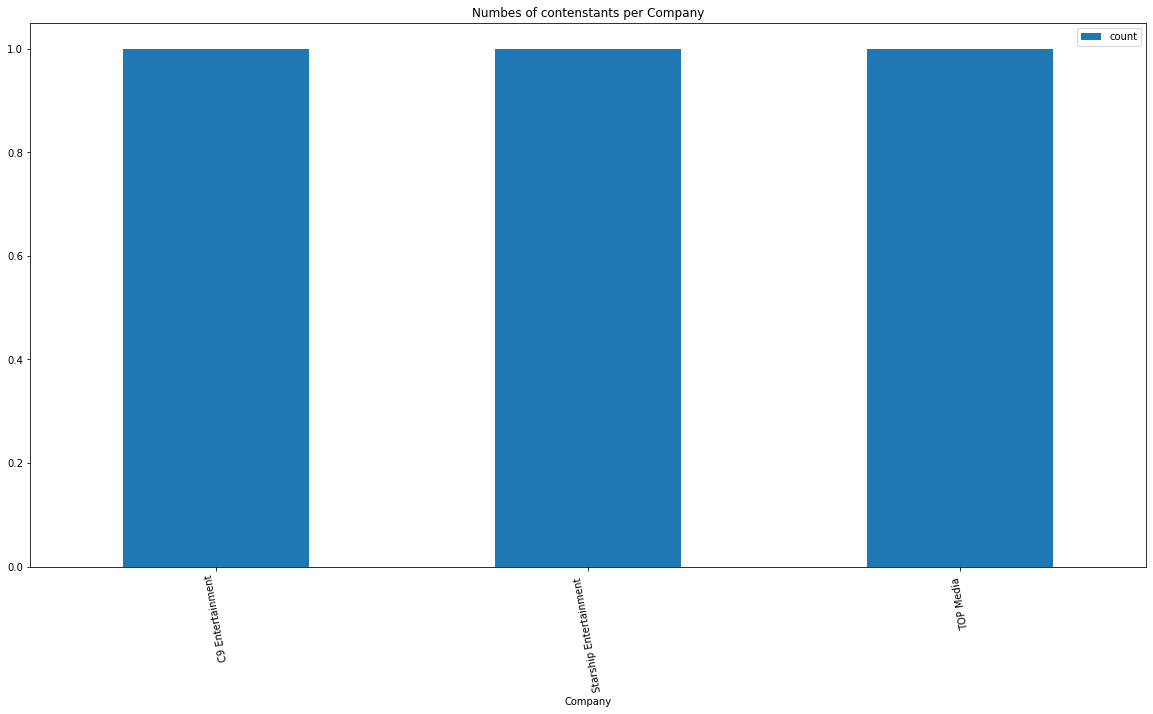

,Company,count
0,C9 Entertainment,1
1,Starship Entertainment,1
2,TOP Media,1


In [43]:
companyAnalysis(almostX)

After analysing the companies the non-selected trainees came from, two situations can be identified, first that Starthip entertainment could have ended up with three members in the lineup, little over a fourth of the final group, in case the rankings were respected as per the public desire, the conclusion draw from this premise is that the producers in general tried to prevent one company from taking most of the available spots and historically, comparing with the past seasons voting manipulation victims and final rankings, never allowed from more than two spots to be occupied by the same company. This conclusion also helps to understand why Lee Jinhyuk from TOP Media wasn´t allowed its rightful spot in the final group, since the lineup already consisted of one member from TOP Media that in this case also belonged to the same, already debuted, group, which taking as reference previous seasons victims was also a reason for these members not to be included. In the case of Keum Donghyun belonging to a historically not selected company doesn't result enough of a reason to be cut from the winners, so further analysis is required to determine the cause of voting manipulation against him.

### Age analysis

The average age is 20
The most common age is 17


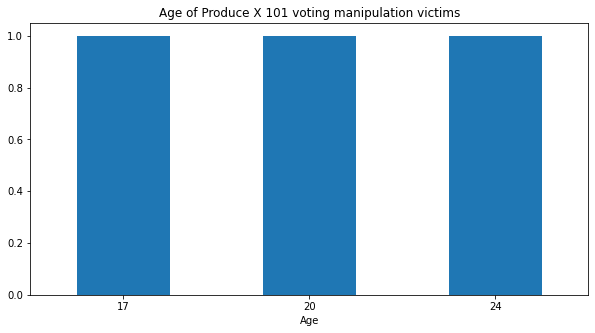

In [44]:
ageAnalysis(almostX, 'Age of Produce X 101 voting manipulation victims')

The average age is 18
The most common age is 16


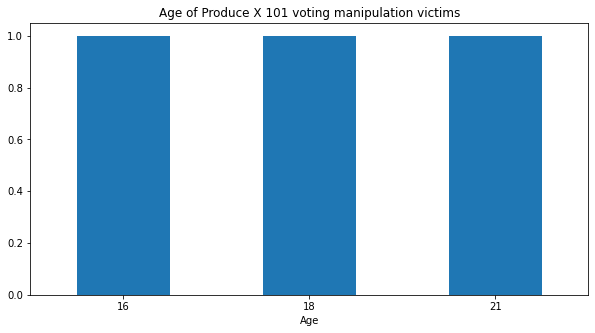

In [45]:
ageAnalysis(X1[6:9], 'Age of Produce X 101 voting manipulation victims')

When analyzing the age of the voting manipulation victims against the trainees who were selected in their place a trend appears, where younger participants were preferred instead of the ones selected by the public, it is interesting to note that the average age of participants 6 to 8 in the official lineup is 18 while the average age of the trainees in position 6 to 8 as selected by the public is 20. It can be inferred these changes were made in order to bring the age of the group as a whole down, since it is important to remember this series are catered towards teens and preteens, so an average age of 20 would be more marketable towards this group.

### Height Analysis

The average height is 180
The most common Height is 174


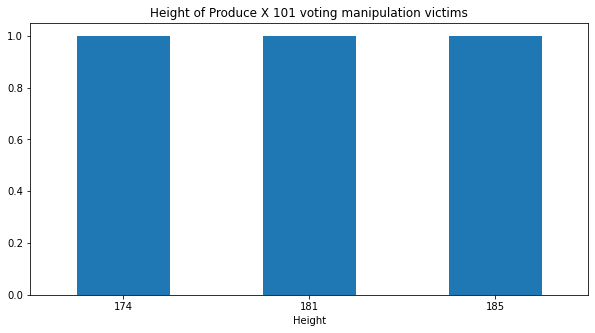

In [46]:
heightsAnalysis(almostX, 'Height of Produce X 101 voting manipulation victims')

The average height is 178
The most common Height is 176


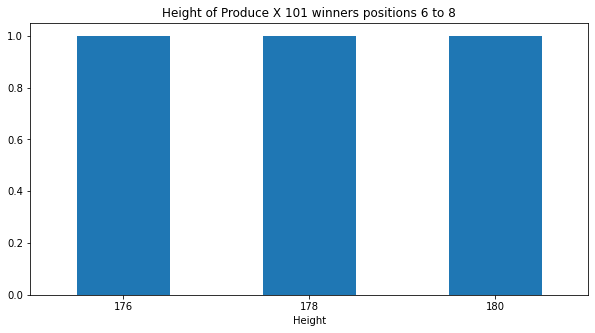

In [47]:
heightsAnalysis(X1[6:9], 'Height of Produce X 101 winners positions 6 to 8')

Surprisingly the heights of the voting manipulation victims against the participants in the final lineup are greater, an average of 180cm against an average of 178cm, this information is considered surprising because the Beauty Standards in South Korea tends to favour men whose height is 180cm of grater, one could have thought with this information the producers would prefer to bring the average height of the group up instead of down. Since this is the case height cannot be considered as one of the factors the producer used to make changes in the final group.

### Weight Analysis

The average Weight is 58
The most common Weight is 55


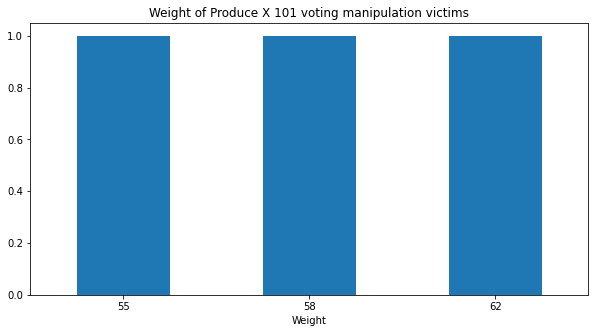

In [48]:
weightAnalysis(almostX, 'Weight of Produce X 101 voting manipulation victims')

The average Weight is 64
The most common Weight is 62


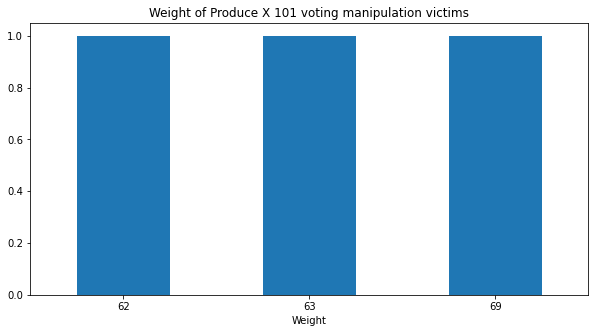

In [49]:
weightAnalysis(X1[6:9], 'Weight of Produce X 101 voting manipulation victims')

One again, as was the case with the Height, the weight deviates from the standard and instead of going down, as expected from a society that favours slimness, it goes up showing that the producers didn't take into consideration aesthetical factors such as Height or Weight when making the decision of replacing members in the final group. If anything this comparison serves to show the members chosen by the public go in correlation with the general perceived standard of attractiveness in South Korea. 

### Trainning Period Analysis 

The average Trainning Period in months is 40
The most common Trainning Period in months is 14


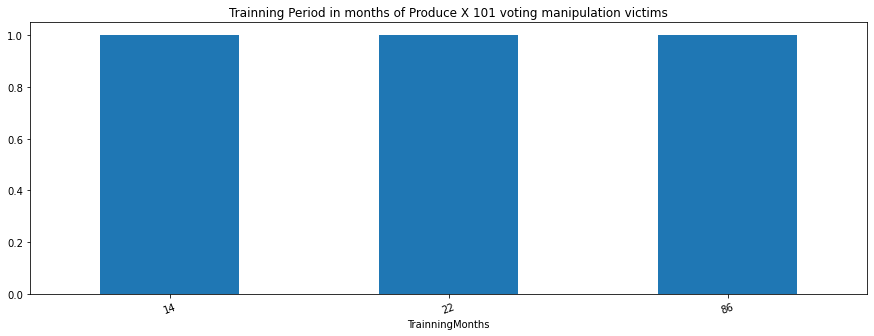

In [50]:
trainningAnalysis(almostX, 'Trainning Period in months of Produce X 101 voting manipulation victims')

The average Trainning Period in months is 23
The most common Trainning Period in months is 5


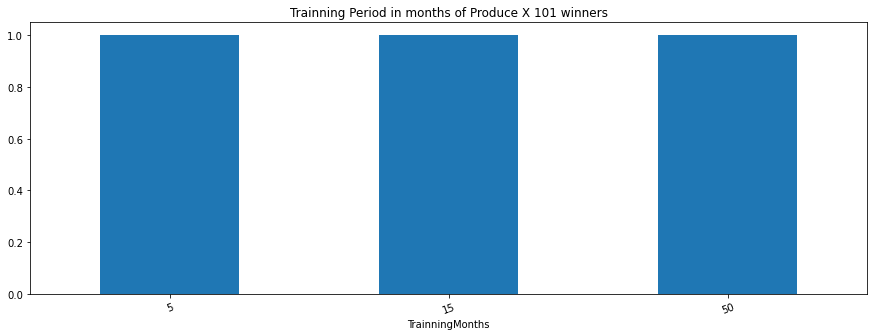

In [51]:
trainningAnalysis(X1[6:9], 'Trainning Period in months of Produce X 101 winners')

In this comparison the main factor that undermines the difference between the produce selected trainees and the public selected ones is the Training Period, while the public selected participants have a much greater training period of on average 40 months, the ones selected by the producers have only 23 months of training in average, little over half the training of the former. It is obvious the producers preferred trainees whose abilities were not yet fully developed or if this not the case at least there was a preference towards participants with the least amount of experience.

### Skill Analysis

Skill
dancer    1
rapper    1
singer    1
Name: Name, dtype: int64


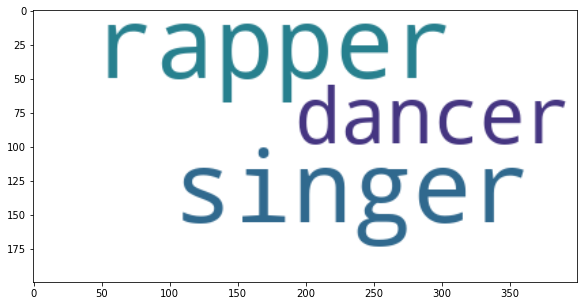

In [52]:
skillAnalysis(almostX)

Skill
dancer    1
rapper    1
singer    1
Name: Name, dtype: int64


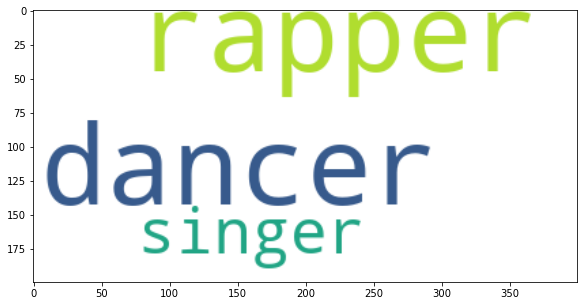

In [53]:
skillAnalysis(X1[6:9])

As denoted by the previous information, the skill of the participants also did not make an impact in whether they were or not selected for the final lineup, in any case the participants selected according to the votes had the same exact skills as the ones selected by the producers, so it is conclusive the skills of the participants had no correlation in their final group status.

### First Evaluation

Judges_Evaluation1
B    2
X    1
Name: Name, dtype: int64


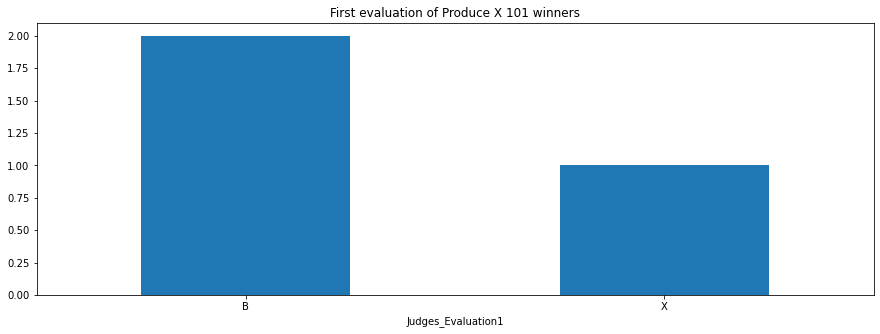

In [54]:
evaluationOne(almostX, 'First evaluation of Produce X 101 winners')

Judges_Evaluation1
A    1
C    2
Name: Name, dtype: int64


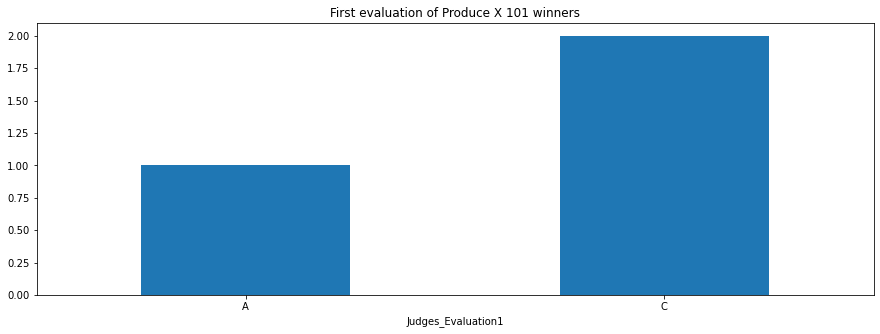

In [55]:
evaluationOne(X1[6:9], 'First evaluation of Produce X 101 winners')

When comparing the first judges evaluation of both groups the information does not result conclusive as to whether this field had anything to do in the changes of the final lineup, disproving the initial premise of preference being given to participants who ranked between the top 2 levels in this evaluation, since both, participants selected by the public and by the producers, had rankings within the range of selected members of X1.

### Judges Second Evaluation

Judges_Evaluation2
A    1
C    1
F    1
Name: Name, dtype: int64


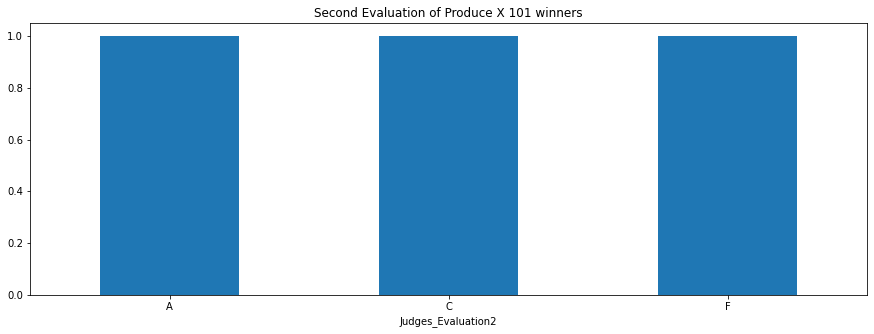

In [56]:
evaluationTwo(almostX, 'Second Evaluation of Produce X 101 winners')

Judges_Evaluation2
C    1
D    2
Name: Name, dtype: int64


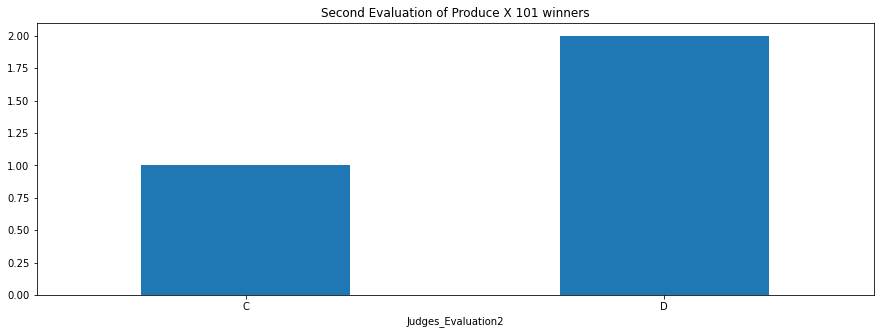

In [57]:
evaluationTwo(X1[6:9], 'Second Evaluation of Produce X 101 winners')

In concordance with the initial premise there also does not exists a correlation between the grades received by the trainees in the second evaluation and the changes made in the groups lineup.

### Ranking Analysis

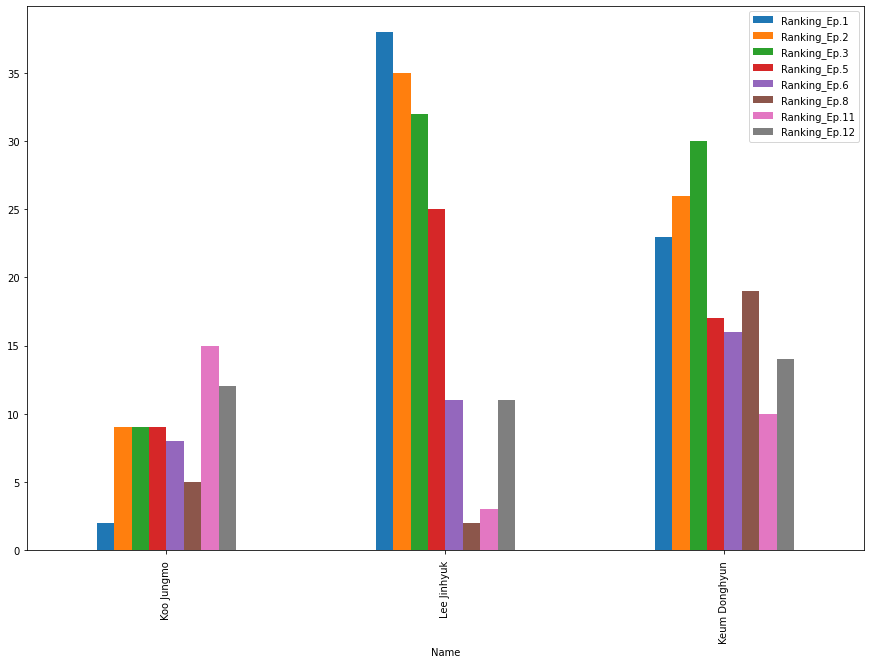

,Ranking_Ep.1,Ranking_Ep.2,Ranking_Ep.3,Ranking_Ep.5,Ranking_Ep.6,Ranking_Ep.8,Ranking_Ep.11,Ranking_Ep.12
0,2,9,9,9,8,5,15,12
1,38,35,32,25,11,2,3,11
2,23,26,30,17,16,19,10,14


In [58]:
episodeRanking(almostX)

When analysing the rankings the vote manipulation becomes clearer as it is pretty obvious how it occurred, like Koo jungmo who had always occupied positions within the first ten before the last two episodes, Lee Jinhyuk who had consistently gone up the rankings and in episode 11 was number 3 before falling all the way down to 11. In the case of Keum Donghyun it is more difficult to clearly accuse sabotage of occurring since he had always occupied rankings below 10 but nevertheless it is not impossible to distinguish sabotage of happening since he also had demonstrated a tendency of going up in the rankings with each episode, so him placing 8th after being 10th for episode 11 seems logical.

### Votes Analysis 

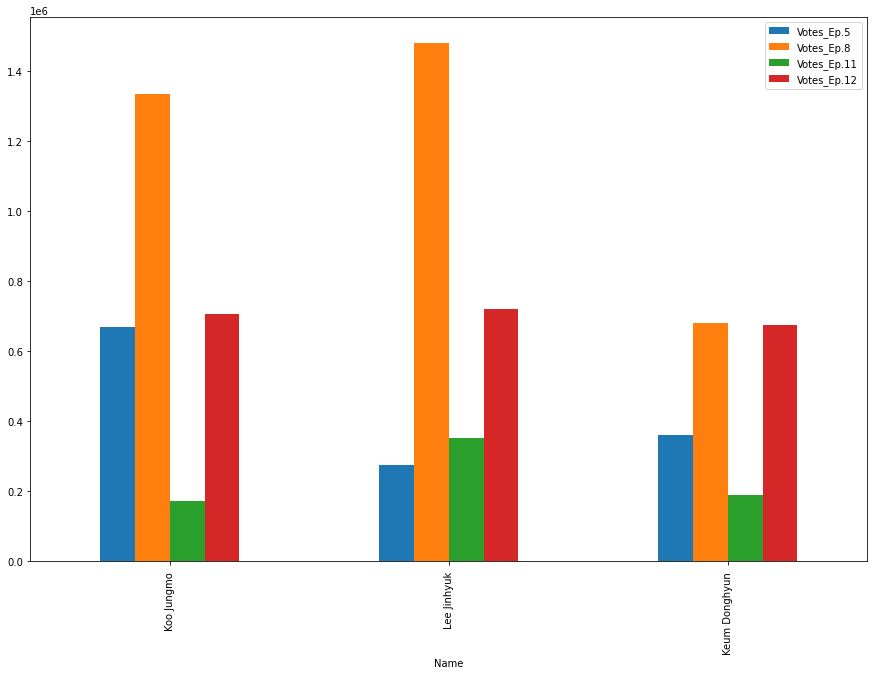

,Votes_Ep.5,Votes_Ep.8,Votes_Ep.11,Votes_Ep.12
0,669616,1334726,172337,704748
1,274197,1480425,351174,719466
2,360277,680687,187264,674500


In [59]:
episodeVotes(almostX)

As expected considering that the vote manipulation happened during the live broadcast of the show, the votes of the participants selected by the public follow the same tendencies as the analysis of the votes of all Omega X members. It is not possible to draw determinant conclusions from this information.

## Conclusions

After analysing every piece of relevant data presented in this research it is possible to come to the following conclusions:
   1. The main reason why participants were removed from the final lineup has do to with said participants belonging to certain
   entertainment agencies who either had already more than one member already belonging to the final group, in the case of Koo 
   Jungmo or who belonged to the same already debuted group from the same agency like Lee Jinhyuk
   2. When selecting the characteristics of the participants who the producers chose to replace the fore mentioned trainees,
   aspects such as younger age and shorter training periods were taken into preference, adding to said aspects it also has to 
   be mentioned there existed a preference of agencies, with MBK entertainment occupying positions 6 and 7, and Woolim
   entertainment position 8, both agencies already had trainees who debuted in previous seasons.
   3. Physical aspects such as Height or Weight were not taken into account by the producers when making adjustments to the
   lineup, as for skill it cannot be said it played a role either, but it is worth mentioning that despite the changes made skills of participants were not lost from the group as they were replaced by trainees with the same exact skills. 
   4. For trainee Keum Donghyun, although he satisfied the requirements of being in the younger age range and having a training period relative to the one of other participants not removed from the lineup, it can be concluded he ultimately did not made it into the group due to coming from a relatively smaller agency, with no previous history of trainees debuting in past seasons.
   
In summary, the final conclusion is that the reason some trainees were denied their rightfully earned debuting rights, was because producers gave preference to certain entertainment agencies, which coincides with claims of said agencies bribing them for better results. Although it is not a ground-breaking discovery it helps shed light on a problem that most societies face as a whole, which is corruption. It is hoped this small scale project supports, in a small manner, the efforts being made today to fight against it.


# References

Wikipedia contributors. (2022, July 8). List of Produce X 101 contestants. In Wikipedia, The Free Encyclopedia. Retrieved 16:50, December 6, 2022, from https://en.wikipedia.org/w/index.php?title=List_of_Produce_X_101_contestants&oldid=1097057302
Wikipedia contributors. (2022, November 10). Mnet vote manipulation investigation. In Wikipedia, The Free Encyclopedia. Retrieved 16:51, December 6, 2022, from https://en.wikipedia.org/w/index.php?title=Mnet_vote_manipulation_investigation&oldid=1121150501
K-pop Database. (2019, March 25). Produce X 101 Contestants. In db Kpop. Retrieved 10:54, December 10, 2022, from https://dbkpop.com/db/produce-x-101-contestants/
cntrljinsung. (2019, March 23). Produce X 101 (Survival Show). In Kprofiles. Retrieved 10:57, December 10, 2022, from https://kprofiles.com/produce-x-101-survival-show/
Valley A. (2021, September 19). Here’s What The 6 “Produce X 101” Vote Manipulation Victims Are Doing Now. In koreaboo. Retieved 10:59, December 10, 2022, from https://www.koreaboo.com/lists/produce-x-101-vote-manipulation-victims-now/
Kim U. (2019, May 8). “Produce X 101” Announces Departure Of Trainee Im Siu. In Soompi. Retrieved 11:00, December 10, 2022, from https://www.soompi.com/article/1322963wpp/produce-x-101-announces-departure-of-trainee-im-siu